In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr

import tensorflow as tf


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\tensorflow\python\framework\dty

1.0.5


In [6]:
zonal_sst = './Datasets/Zonal SST.csv'
zonal_sst = pd.read_csv(zonal_sst)
mid_tropics = ['24S-24N']
north_equator = ['EQU-24N']
south_equator = ['24S-EQU']

mid_sst = zonal_sst[mid_tropics]
north_sst = zonal_sst[north_equator]
south_sst = zonal_sst[south_equator]

SSTyear = zonal_sst.Year
SSTtime = zonal_sst.time
SSTt = zonal_sst.time_relative_1750
features = ['Year', 'time']
SSTx = zonal_sst[features]


In [7]:
atlantic_sst = './Datasets/Atlantic_SST_PDI.csv'
atlantic_sst = pd.read_csv(atlantic_sst)
sst = atlantic_sst.SST_anomaly

SSTyear1 = atlantic_sst.Year
SSTtime1 = atlantic_sst.time
features = ['Year', 'time']
SSTx1 = atlantic_sst[features]

# ML Pipeline

In [14]:
#import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
#import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')

params = {'n_estimators': 10000, 'max_depth': 4,
          'learning_rate': 0.1, 'loss': 'ls'}
model = GradientBoostingRegressor(**params)
#X_train = x_train = X_test = x_test = y_train = y_test = None

class MachineLearningAlgorithm:
    def __init__(self, x, X, y):
        print('Additive Gradient Boosting Learning Model: ')
        self.x = x
        self.X = X
        self.y = y
        
    def testSplitValid(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2)
        x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=0.2)
        
        plt.scatter(x_train, y_train, color='r', s = 6, alpha=0.5)
        plt.scatter(x_test, y_test, color='b', s = 6, alpha=0.5)
        plt.title('Train/Test Split Graph')
        plt.xlabel('Years')
        plt.ylabel('Molar Ratio')
        plt.show()
        print(' ')
        
        print('Model Training: ')
        model.fit(X_train, y_train)
        train_theoretical = model.predict(X_train)
        plt.scatter(x_train, y_train, color="g", s = 6, alpha=0.5)
        plt.scatter(x_train, train_theoretical, color='y', s = 6, alpha=0.5)
        plt.show()
        print('MAE for train set: ', mean_absolute_error(y_train, train_theoretical))
        print(' ')
        
        print("Validating Test Data: ")
        test_theoretical = model.predict(X_test)
        plt.scatter(x_test, y_test, color="g", s = 6, alpha=0.5)
        plt.scatter(x_test, test_theoretical, color='y', s = 6, alpha=0.5)
        plt.show()
        print('MAE for test set: ', mean_absolute_error(y_test, test_theoretical))
        print(' ')
        print(' ')
        
        mae_list = []
        max_leaf_node_list = [5, 50, 500, 5000]
        for max_leaf_nodes in max_leaf_node_list:
            my_mae = self.get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
            mae_list.append(my_mae)
            print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
            print(' ')
        
        mae_list.sort()
        smallest_mae = mae_list[0]
        element_index = mae_list.index(smallest_mae)
        final_mln = max_leaf_node_list[element_index]
        self.finalFit(final_mln)
        
    def get_mae(self, mln, train_X, test_X, train_y, test_y):
        model.fit(train_X, train_y)
        preds = model.predict(test_X)
        mae = mean_absolute_error(test_y, preds)
        return(mae)
    
    def finalFit(self, mln):
        self.final_model = GradientBoostingRegressor(max_leaf_nodes=mln, random_state=0)
        self.final_model.fit(self.X, self.y)
        theoretical_preds = self.final_model.predict(self.X)
        print('Final Holistic Prediction: ')
        plt.scatter(self.x, self.y, color="g", s = 6, alpha=0.5)
        plt.scatter(self.x, theoretical_preds, color='y', s = 6, alpha=0.5)
        plt.show()
        print('MAE for final prediction: ', mean_absolute_error(self.y, theoretical_preds))
        
    def predict(self, x, X):
        final_preds = self.final_model.predict(X)
        plt.scatter(self.x, self.y, color="g", s = 6, alpha=0.5)
        plt.scatter(x, final_preds, color='y', s = 6, alpha=0.5)
        return final_preds
        
        
        
        
        
        


# SST Data

Text(0, 0.5, 'SST (Degrees Celsius)')

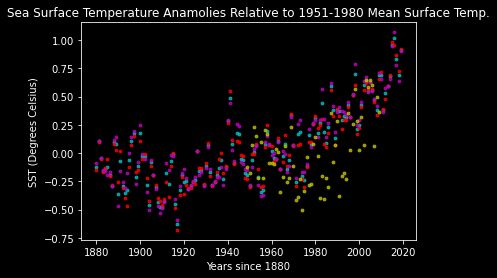

In [15]:
plt.scatter(SSTyear, mid_sst, color='c', s = 8, alpha=0.8)
plt.scatter(SSTyear, north_sst, color='r', s = 8, alpha=0.8)
plt.scatter(SSTyear, south_sst, color='m', s = 8, alpha=0.8)
plt.scatter(SSTyear1, sst, color='y', s = 8, alpha=0.8)
plt.title('Sea Surface Temperature Anamolies Relative to 1951-1980 Mean Surface Temp.')
plt.xlabel('Years since 1880')
plt.ylabel('SST (Degrees Celsius)')

In [27]:
sstYearExtrap = list(range(1820, 2020))
sstTimeExtrap = [ x-1820 for x in sstYearExtrap ]

data = {'Year': sstYearExtrap,
        'time': sstTimeExtrap
        }
sstExtrapX = pd.DataFrame(data, columns = ['Year', 'time'])
print(sstExtrapX)

     Year  time
0    1820     0
1    1821     1
2    1822     2
3    1823     3
4    1824     4
..    ...   ...
195  2015   195
196  2016   196
197  2017   197
198  2018   198
199  2019   199

[200 rows x 2 columns]


Additive Gradient Boosting Learning Model: 


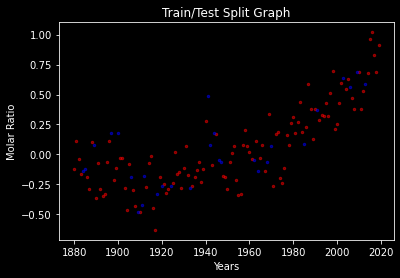

 
Model Training: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


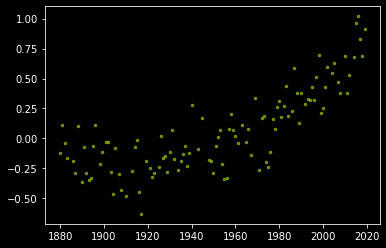

MAE for train set:  7.347173464860341e-16
 
Validating Test Data: 


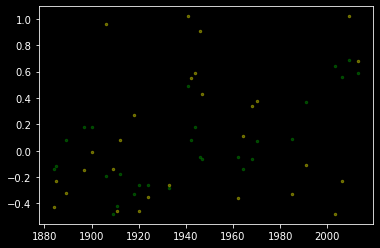

MAE for test set:  0.4064285714285706
 
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 50  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 500  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5000  		 Mean Absolute Error:  0
 
Final Holistic Prediction: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


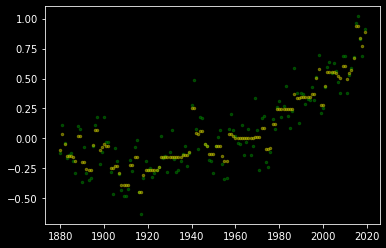

MAE for final prediction:  0.07249602936746422


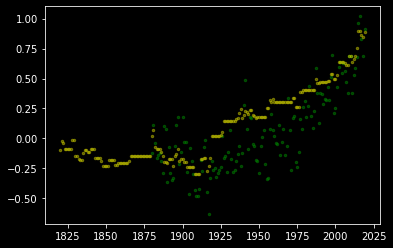

In [28]:
mid_tropicsModel = MachineLearningAlgorithm(SSTyear, SSTx, mid_sst)
mid_tropicsModel.testSplitValid()
mid_tropics_preds = mid_tropicsModel.predict(sstYearExtrap, sstExtrapX)

Additive Gradient Boosting Learning Model: 


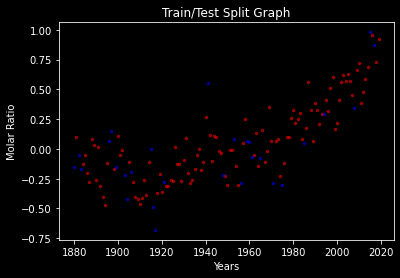

 
Model Training: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


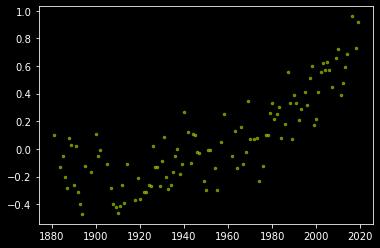

MAE for train set:  4.2527119255129616e-16
 
Validating Test Data: 


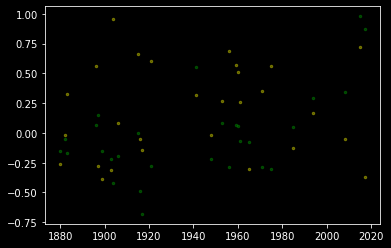

MAE for test set:  0.4589285714285712
 
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 50  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 500  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5000  		 Mean Absolute Error:  0
 
Final Holistic Prediction: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


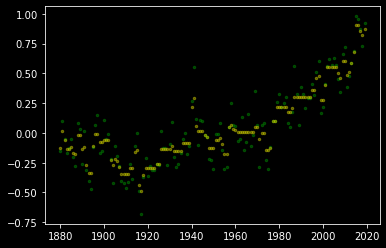

MAE for final prediction:  0.074143187601503


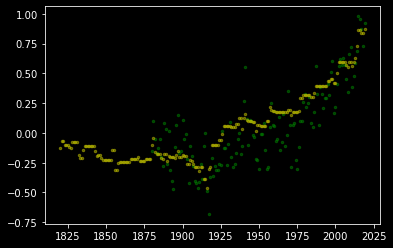

In [29]:
north_tropicsModel = MachineLearningAlgorithm(SSTyear, SSTx, north_sst)
north_tropicsModel.testSplitValid()
north_tropics_preds = north_tropicsModel.predict(sstYearExtrap, sstExtrapX)

Additive Gradient Boosting Learning Model: 


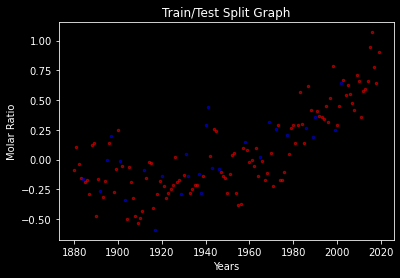

 
Model Training: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


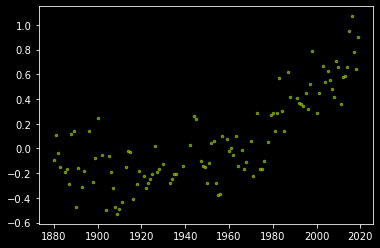

MAE for train set:  4.977047406419674e-16
 
Validating Test Data: 


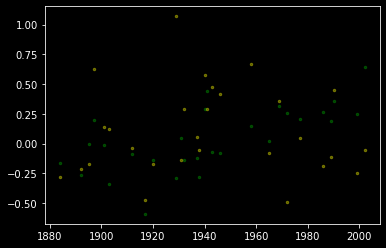

MAE for test set:  0.3239285714285712
 
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 50  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 500  		 Mean Absolute Error:  0
 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Max leaf nodes: 5000  		 Mean Absolute Error:  0
 
Final Holistic Prediction: 


C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


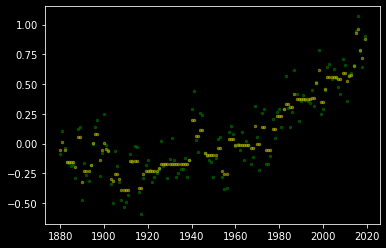

MAE for final prediction:  0.07514609338838894


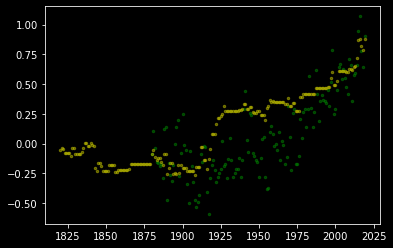

In [30]:
south_tropicsModel = MachineLearningAlgorithm(SSTyear, SSTx, south_sst)
south_tropicsModel.testSplitValid()
south_tropics_preds = south_tropicsModel.predict(sstYearExtrap, sstExtrapX)

In [33]:
optimal_tropics_anomaly = []
optimal_tropics_SST = []
for x in range(len(mid_tropics_preds)):
    avg = (mid_tropics_preds[x] + north_tropics_preds[x] + south_tropics_preds[x])/3
    optimal_tropics_anomaly.append(avg)
    optimal_tropics_SST.append(avg+27.69221833)

In [35]:
extrapolatedSST = pd.DataFrame({"Year":sstYearExtrap, 
                    "time":sstTimeExtrap,  
                    "extrapAnomaly":optimal_tropics_anomaly,
                    "extrapSST":optimal_tropics_SST}) 

extrapolatedSST.to_csv('./Datasets/Programmed Datasets/FinalSST.csv')

## End

In [9]:
CO2merge = []  #This is used to merge all of the CO2 dataset y-values into one dataset
CO2timeset = []  #This dataset will merge all of the years or x-values together

class order:
    def rank (self, a, b, c):
        originalRank = [CO2time[a], GHGt[b], NOAA_GHGtime[c]]
        rank = [CO2time[a], GHGt[b], NOAA_GHGtime[c]]
        rank.sort()
        least = rank[0]
        elementId = originalRank.index(least)
        
        if elementId == 0:
            CO2merge.append(CO2[a])
            a = a+1
        if elementId == 1:
            CO2merge.append(CO2_1[b])
            b = b+1
        if elementId == 2:
            CO2merge.append(CO2_2[c])
            c = c+1
            
        return a, b, c
        

order = order()

a = b = c = 0
while a <= len(CO2year) or b <= len(GHGyear) or c <= len(NOAA_GHGyear):
    '''order.rank(a, b, c)
    a = a
    b = b
    c = c'''
    if b == len(GHGyear):
        GHGt[b] = 1000
    if c == len(NOAA_GHGyear):
        NOAA_GHGtime[c] = 1000
        
    if a == len(CO2year):
        break
    
    originalRank = [CO2time[a], GHGt[b], NOAA_GHGtime[c]]
    rank = [CO2time[a], GHGt[b], NOAA_GHGtime[c]]
    rank.sort()
    least = rank[0]
    elementId = originalRank.index(least)
     
    if elementId == 0:
        CO2merge.append(CO2[a])
        CO2timeset.append(CO2time[a])
        a = a+1
    if elementId == 1:
        CO2merge.append(CO2_1[b])
        CO2timeset.append(GHGt[b])
        b = b+1
        
    if elementId == 2:
        CO2merge.append(CO2_2[c])
        CO2timeset.append(NOAA_GHGtime[c])
        c = c+1

years = []
for i in CO2timeset:
    years.append(i+1750)

data = {'Year': years,
        'time': CO2timeset,
        'CO2': CO2merge
        }
completeCO2set = pd.DataFrame(data, columns = ['Year', 'time', 'CO2'])
completeCO2set.to_csv('./Datasets/Programmed Datasets/HolisticCO2.csv')

C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\surya_5mk2dxf\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## End

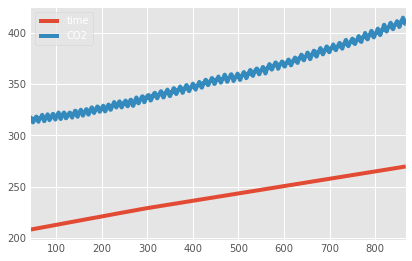

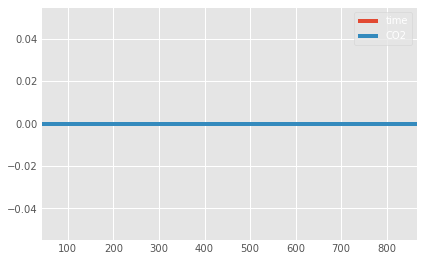

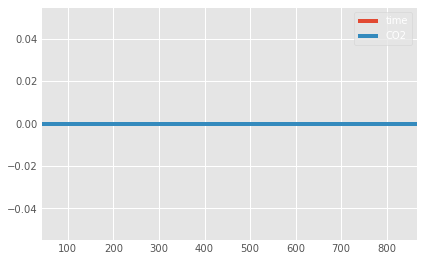

In [101]:
CO2new = pd.read_csv('./Datasets/Programmed Datasets/HolisticCO2.csv')
seasonalData = CO2new.CO2
seasonalTime = CO2new.time

seasonalData = seasonalData[42:]
seasonalTime = seasonalTime[42:]
seasonalT = []
for i in seasonalTime:
    seasonalT.append(i+1750)


rawData = pd.read_csv('./Datasets/Programmed Datasets/HolisticCO2.csv', header=0, index_col=0)
CO2seasonal = rawData[42:]

plt.style.use('ggplot')

decomposition = seasonal_decompose(CO2seasonal, model='additive', freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

trend.plot()
seasonal.plot()
residual.plot()
plt.show()

Text(0, 0.5, 'Parts per Million')

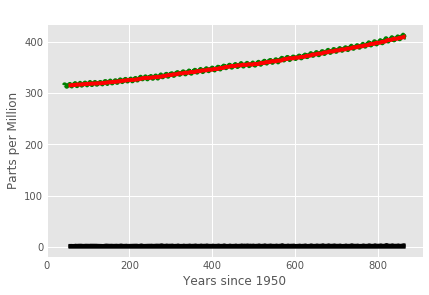

In [116]:
def sma(value, window):
    weight = np.repeat(1.0, window)/window
    sma = np.convolve(value, weight, 'valid')
    return sma

smaCO2 = sma(seasonalData, 30)
smaTime = sma(seasonalT, 30)

from statsmodels.tsa.stattools import adfuller
rolmean = CO2seasonal.rolling(12).mean()
rolstd = CO2seasonal.rolling(12).std()

plt.plot(CO2seasonal['CO2'], color='green', label = 'Rolling Std')
plt.plot(rolmean['CO2'], color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.plot()
plt.title('Carbon Dioxide Concentrations')
plt.xlabel('Years since 1950')
plt.ylabel('Parts per Million')

#print(rolmean)



Results of Dickey-Fuller Test:


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().